In [105]:
import pandas as pd
import subprocess
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe


from os.path import join as pJoin
from os.path import dirname as pDir


parentDirectoryMain = pDir(pDir(os.path.abspath('__file__')))

In [106]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")


# DATA PREPARATION

# Johns Hopkins GITHUB csv data

In [107]:
data_path=r'..\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [108]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [109]:
#Current Data Automation (git_pull)
def get_johns_hopkins():
    ''' Get data by a git pull request, the source code has to be pulled first
        Result is stored in the predifined csv structure
    '''

    dataFilePath = pJoin(parentDirectoryMain,"data","raw","COVID-19")
    print(dataFilePath)

    git_pull = subprocess.Popen( "git pull" ,
                         cwd = dataFilePath,
                         shell = True,
                         stdout = subprocess.PIPE,
                         stderr = subprocess.PIPE )
    (out, error) = git_pull.communicate()
    print("Error : " + str(error))
    print("out : " + str(out))

get_johns_hopkins()

C:\Users\donda\OneDrive\Desktop\Data\data_science_2022\data\raw\COVID-19
Error : b''
out : b'Already up to date.\n'


In [110]:
time_index=pd_raw.columns[4:]

In [111]:
df_plot = pd.DataFrame({
    'date':time_index})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [112]:
#function returns the list of countries
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [113]:
pd_raw[pd_raw['Country/Region']=='Australia'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [114]:
country_list=['Australia',
              'Spain',
              'United Kingdom',
             ] 

In [115]:
 for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [116]:
df_plot.head()

,date,Australia,Spain,United Kingdom
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,4,0,0


# Task 1: Confirmed COVID Cases per Population w.r.t. Data

In [117]:

populationData = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv')
populationData.head()

,Country Name,Country Code,2018
0,Aruba,ABW,105845.0
1,Afghanistan,AFG,37172386.0
2,Angola,AGO,30809762.0
3,Albania,ALB,2866376.0
4,Andorra,AND,77006.0


In [118]:
populationData = populationData.drop(['Country Code',], axis=1) 
populationData.head()              


,Country Name,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [119]:
 populationData = populationData.rename(columns = {'2018' : 'Population'})  
populationData.head()

,Country Name,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0


In [120]:
populationData = populationData.set_index(['Country Name']).T
populationData.head()
populationData['Australia']

Population    24992369.0
Name: Australia, dtype: float64

In [121]:
#Dividing each confirmed cases by population of the country

for each in country_list:
    df_plot[each] = np.array(df_plot[each]/float(populationData[each]))

In [122]:
df_plot

,date,Australia,Spain,United Kingdom
0,1/22/20,0.000000e+00,0.000000,0.000000
1,1/23/20,0.000000e+00,0.000000,0.000000
2,1/24/20,0.000000e+00,0.000000,0.000000
3,1/25/20,0.000000e+00,0.000000,0.000000
4,1/26/20,1.600489e-07,0.000000,0.000000
...,...,...,...,...
886,6/26/22,3.211504e-01,0.271421,0.342715
887,6/27/22,3.224076e-01,0.271421,0.343428
888,6/28/22,3.233733e-01,0.272539,0.343750
889,6/29/22,3.253364e-01,0.272539,0.344353


Text(0, 0.5, 'Confirmed cases')

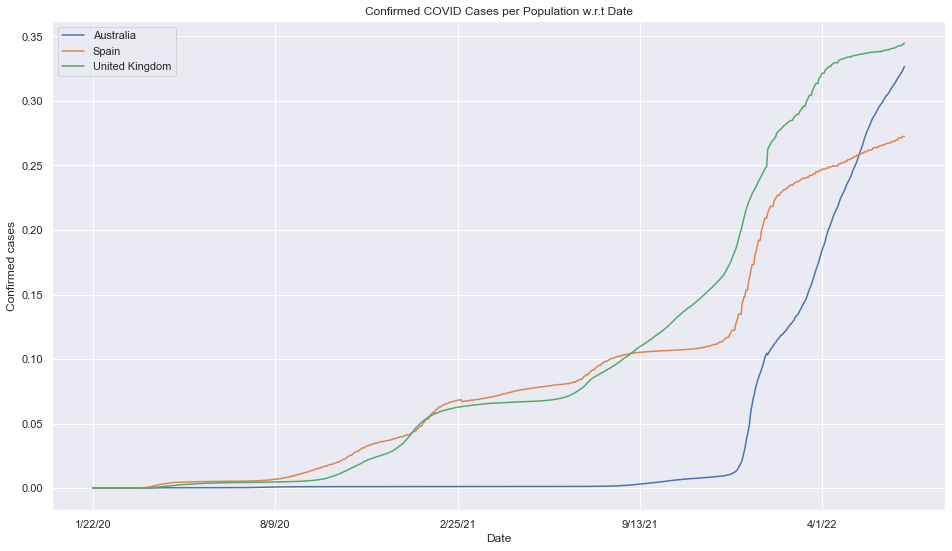

In [123]:
#matplotlib inline

df_plot = df_plot.set_index('date').plot(title = "Confirmed COVID Cases per Population w.r.t Date")
df_plot.set_xlabel("Date")
df_plot.set_ylabel("Confirmed cases")


# Task 2: Vaccination Rate

In [124]:
vaccinationPath = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"
vaccinationData = pd.read_csv(vaccinationPath,sep=',')

In [125]:
vaccinationData.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [126]:
pivotVaccinationData = pd.pivot_table(
    data=vaccinationData,                                # What dataframe to use
    index='Date',                                        # The "rows" of your dataframe
    columns='Country_Region',                            # What values to show as columns
    values='People_fully_vaccinated',                    # What values to aggregate
                                                         # How to aggregate data
    )

pivotVaccinationData = pivotVaccinationData.interpolate(method = 'linear', limit_direction = 'backward')

In [127]:
pivotVaccinationData

Country_Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,World,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22002.0,0.0,0.0,30554.0,0.0,0.0,0.000000e+00,48148.0,0.0,0.0
2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22002.0,0.0,0.0,30554.0,0.0,0.0,0.000000e+00,48148.0,0.0,0.0
2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22002.0,0.0,0.0,30554.0,0.0,0.0,0.000000e+00,48148.0,0.0,0.0
2020-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22002.0,0.0,0.0,30554.0,0.0,0.0,0.000000e+00,48148.0,0.0,0.0
2020-12-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22002.0,0.0,0.0,30554.0,0.0,0.0,0.000000e+00,48148.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,4979930.0,1244383.0,6851660.0,53450.0,6811268.0,62031.0,37558750.0,985807.0,21659860.0,6623045.0,...,50082651.0,2886133.0,15319040.0,126591.0,14287370.0,80674130.0,4.570609e+09,446120.0,4329422.0,4622428.0
2022-06-27,4979930.0,1244383.0,6851660.0,53450.0,6811268.0,62031.0,37559452.0,985807.0,21662163.0,6623045.0,...,50111302.0,2886512.0,15319040.0,126591.0,14287370.0,80710036.0,4.571729e+09,446120.0,4329422.0,4624556.0
2022-06-28,4979930.0,1247475.0,6851660.0,53453.0,6811268.0,62031.0,37562769.0,985807.0,21664352.0,6623045.0,...,50111302.0,2886687.0,15485377.0,126591.0,14287370.0,80890773.0,4.616649e+09,446120.0,4329422.0,4624556.0


In [128]:
pivotVaccinationData = pivotVaccinationData[country_list]
pivotVaccinationDataPlot = pivotVaccinationData.copy()
pivotVaccinationData.tail(60)

Country_Region,Australia,Spain,United Kingdom
Date,,,
2022-05-02,21528799.0,40414329.0,49727305.0
2022-05-03,21537560.0,40414329.0,49727305.0
2022-05-04,21537560.0,40414329.0,49730039.0
2022-05-05,21541667.0,40414329.0,49730039.0
2022-05-06,21545790.0,40439425.0,49730039.0
2022-05-07,21550385.0,40439425.0,49730039.0
2022-05-08,21553633.0,40439425.0,49730039.0
2022-05-09,21557891.0,40439425.0,49780389.0
2022-05-10,21561125.0,40439425.0,49780389.0


In [129]:
for each in country_list:
    pivotVaccinationDataPlot[each] = np.array(pivotVaccinationData[each]/float(populationData[each])*100)
pivotVaccinationDataPlot


Country_Region,Australia,Spain,United Kingdom
Date,,,
2020-12-14,0.000000,0.000000,0.033091
2020-12-15,0.000000,0.000000,0.033091
2020-12-16,0.000000,0.000000,0.033091
2020-12-17,0.000000,0.000000,0.033091
2020-12-18,0.000000,0.000000,0.033091
...,...,...,...
2022-06-26,86.665894,86.787539,75.324727
2022-06-27,86.675109,86.787539,75.367818
2022-06-28,86.683867,86.787539,75.367818


<AxesSubplot:title={'center':'Vaccination Rate'}, xlabel='Date', ylabel='Number of Vaccination'>

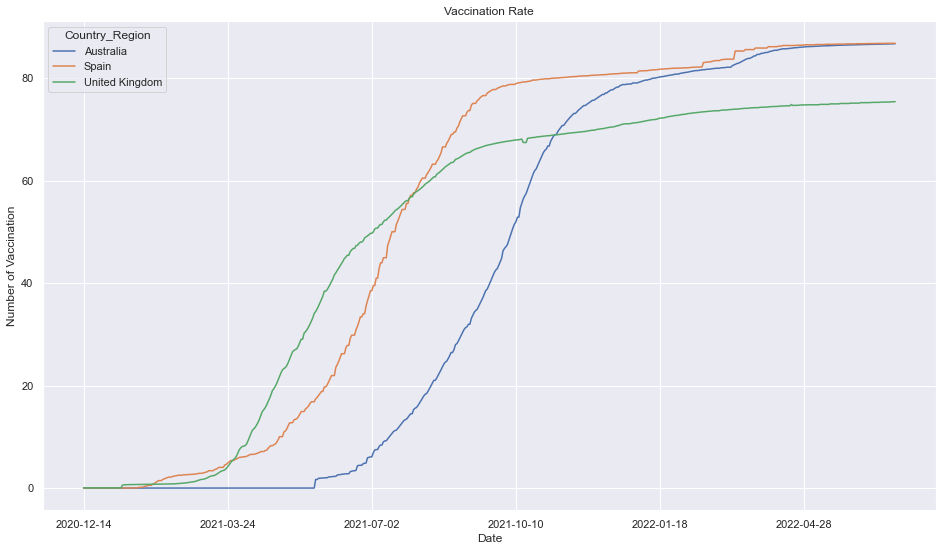

In [130]:
pivotVaccinationDataPlot.plot(title="Vaccination Rate",ylabel= "Number of Vaccination",xlabel = "Date",grid="on",figsize=(16,9))